<a href="https://colab.research.google.com/github/EddiesEdit/Supervised-ML/blob/main/Predicting_House_Prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices with Regression: A Complete Machine Learning Workflow using the Ames Housing Dataset

In this Notebook am going to demostate Machine learninig with Python programming language to model and predict House Price with Regression. Am going to make this a complete Machine Learning workflow using the Ames Housing Dataset from Kaggle.

here is the link to the Dataset: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset.

The goal of this Research  is to able to create a model that can be able to give or predict an House price with all the charateristies of the house save in rows and columns in this give dataset..

In this Notebook am going to use varirous libraries in python for this project,

> Here are my project plan in bits:

* Importing the usefull libraries
* Importing my Dataset from Kaggle
* Becoming one with the datas(Visualization)
* Feature Creation & Extrations
* Data Processing
* Modeling
* Predictions
* Evaluation
* Summary of the Notebook

In [ ]:
# Importing the usefull libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

## Importing my Dataset from Kaggle

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ames-housing-dataset.csv
AmesHousing_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  "AmesHousing.csv"
)

<ipython-input-2-1ac89f1c61db>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  AmesHousing_df = kagglehub.load_dataset(


100%|██████████| 941k/941k [00:00<00:00, 2.88MB/s]


In [ ]:
AmesHousing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
AmesHousing_df.shape

(2930, 82)

In [ ]:
AmesHousing_df["Pool QC"].notna()

,Pool QC
0,False
1,False
2,False
3,False
4,False
...,...
2925,False
2926,False
2927,False
2928,False


In [ ]:
non_nan_Pool_QC = AmesHousing_df[AmesHousing_df['Pool QC'].notna()]['Pool QC']
non_nan_Pool_QC

,Pool QC
1063,Ex
1498,Gd
1566,Gd
1760,Ex
1940,TA
2089,TA
2230,Ex
2278,TA
2350,Fa
2357,Fa


In [ ]:
non_nan_Pool_QC.value_counts()

,count
Pool QC,
Ex,4
Gd,4
TA,3
Fa,2


Becoming one with the datas(Visualization)
I would love to see the salesprice distribution along the rows


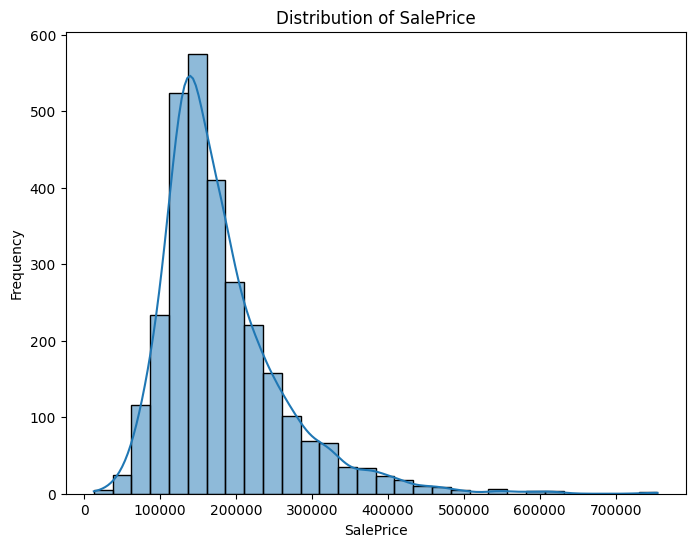

In [ ]:
# Histogram — Distribution of the SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(AmesHousing_df["SalePrice"], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [ ]:
AmesHousing_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Detect Outliers and Compare Distributions Across Overall_Qual

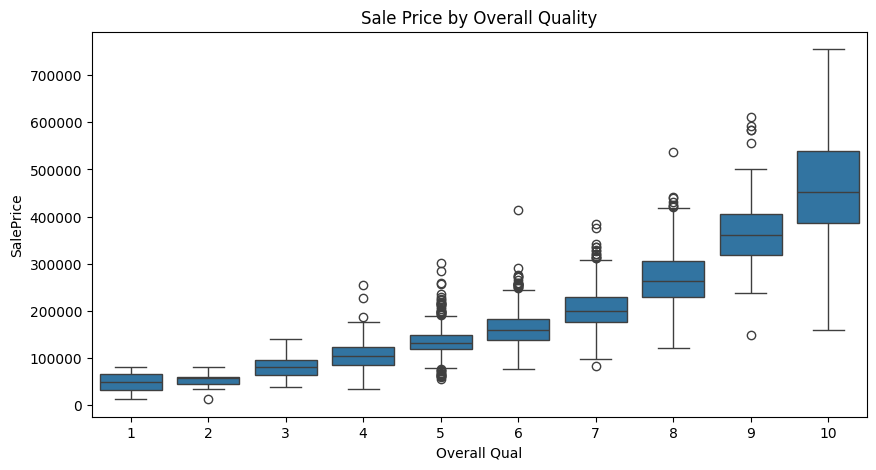

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Overall Qual', y='SalePrice', data=AmesHousing_df)
plt.title('Sale Price by Overall Quality')
plt.show()


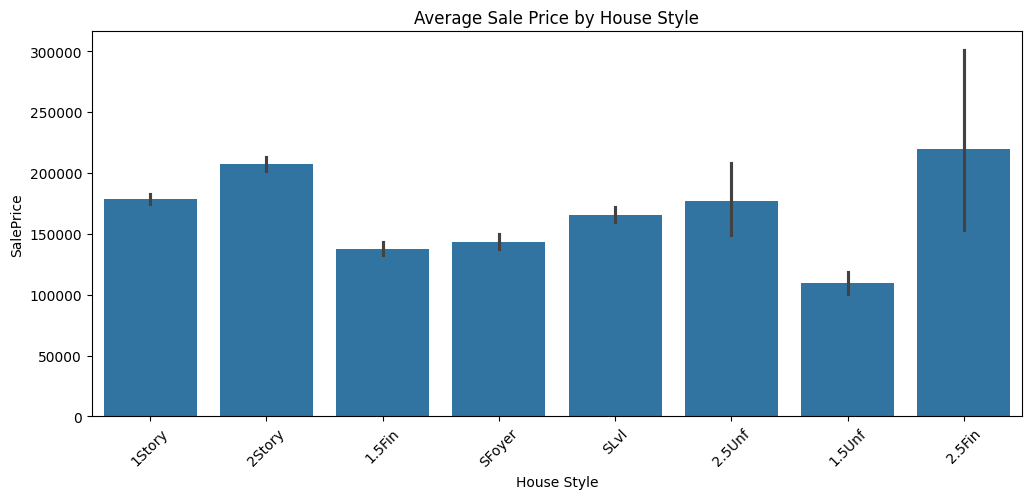

In [ ]:
# Average Sale Price per HouseStyle
plt.figure(figsize=(12,5))
sns.barplot(x='House Style', y='SalePrice', data=AmesHousing_df)
plt.title('Average Sale Price by House Style')
plt.xticks(rotation=45)
plt.show()


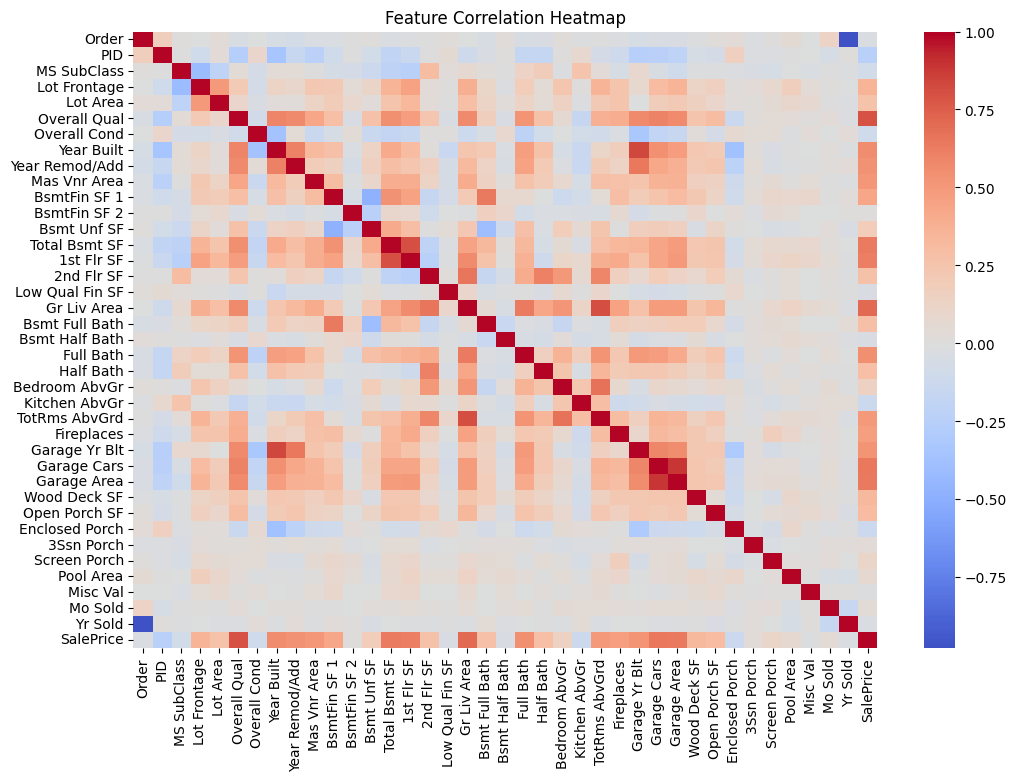

In [ ]:
# Relationships Between Features
plt.figure(figsize=(12,8))
corr = AmesHousing_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
AmesHousing_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

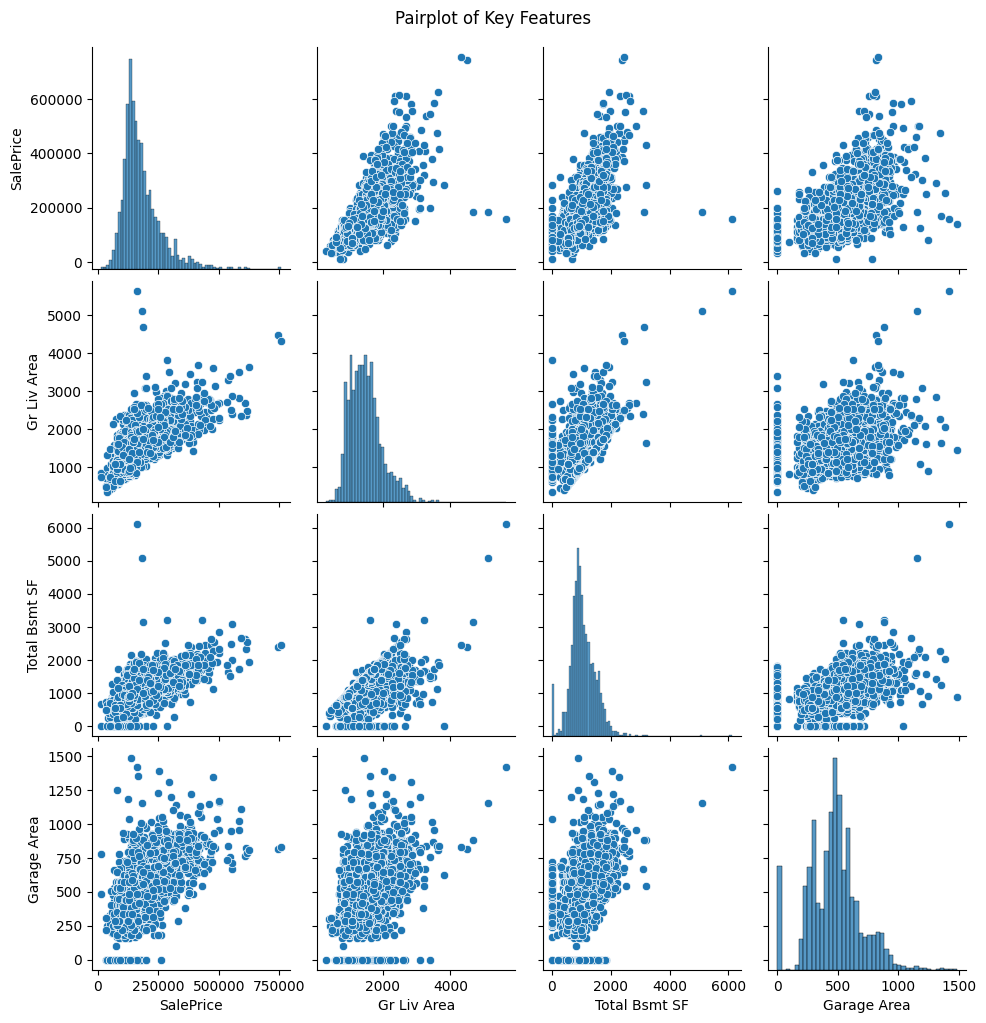

In [ ]:
# Multiple Relationships at Once
subset = AmesHousing_df[['SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area']]
sns.pairplot(subset)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


| Feature Pair                     | Relationship Type             | Insight                                  |
| -------------------------------- | ----------------------------- | ---------------------------------------- |
| **SalePrice vs Gr Liv Area**     | Strong positive correlation   | Larger living area → Higher price        |
| **SalePrice vs Total Bsmt SF**   | Moderate positive correlation | Bigger basement → Higher price           |
| **SalePrice vs Garage Area**     | Moderate correlation          | Garage space adds value                  |
| **Gr Liv Area vs Total Bsmt SF** | Some positive association     | Bigger homes often have larger basements |
| **Garage Area** distributions    | Discrete and right-skewed     | Many homes have small or no garages      |


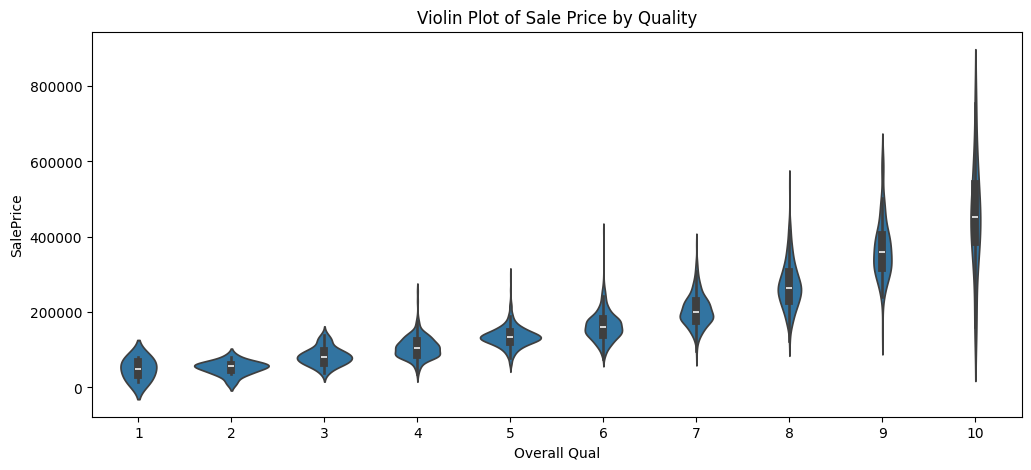

In [ ]:
# Distribution + Probability Density by Overall_Qual
plt.figure(figsize=(12,5))
sns.violinplot(x='Overall Qual', y='SalePrice', data=AmesHousing_df)
plt.title('Violin Plot of Sale Price by Quality')
plt.show()

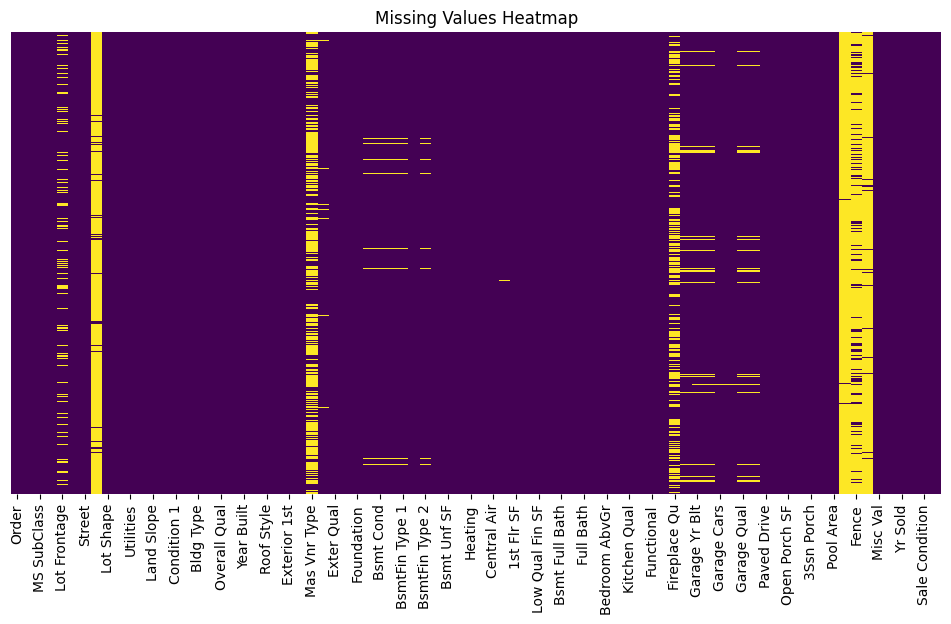

In [ ]:
# Heatmap of Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(AmesHousing_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

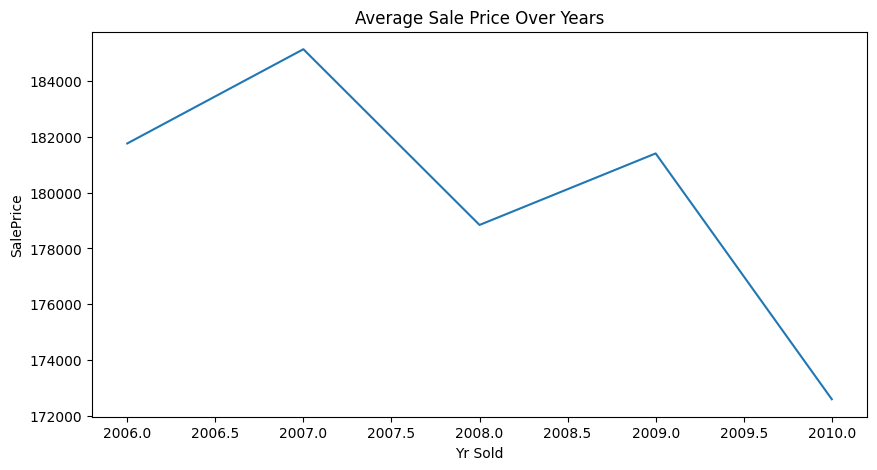

In [ ]:
# Sale Price Trends over Time
df_grouped = AmesHousing_df.groupby('Yr Sold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Yr Sold', y='SalePrice', data=df_grouped)
plt.title('Average Sale Price Over Years')
plt.show()


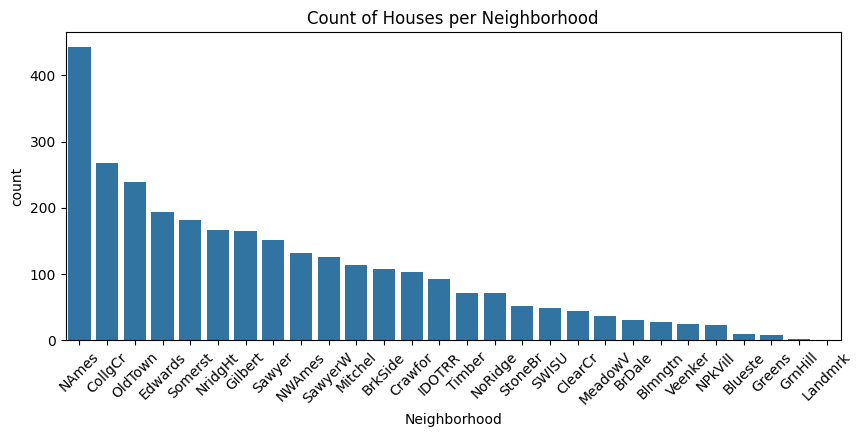

In [ ]:
# Frequency of Categorical Features

plt.figure(figsize=(10,4))
sns.countplot(x='Neighborhood', data=AmesHousing_df, order=AmesHousing_df['Neighborhood'].value_counts().index)
plt.title('Count of Houses per Neighborhood')
plt.xticks(rotation=45)
plt.show()


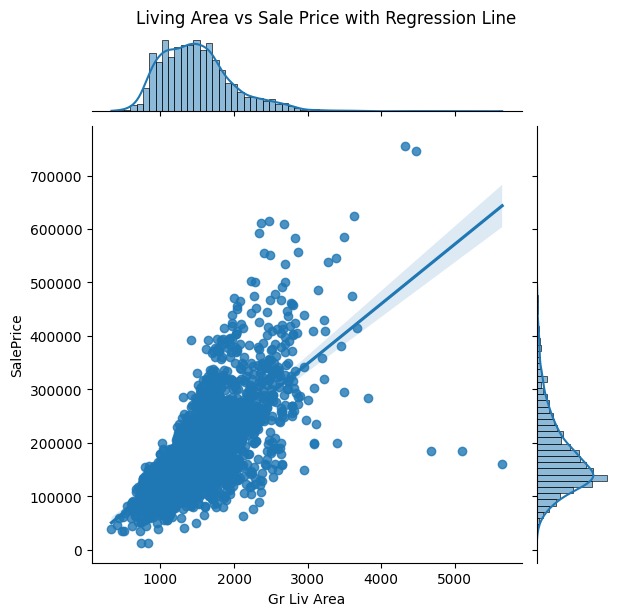

In [ ]:
sns.jointplot(x='Gr Liv Area', y='SalePrice', data=AmesHousing_df, kind='reg')
plt.suptitle('Living Area vs Sale Price with Regression Line', y=1.02)
plt.show()


Gr Liv Area is a very strong predictor of SalePrice.

## Feature Creation & Extrations

In [ ]:
AmesHousing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# Combine different bathroom types into a single numeric feature.

AmesHousing_df['Total Bathrooms'] = AmesHousing_df['Full Bath'] + (0.5 * AmesHousing_df['Half Bath']) + \
                        AmesHousing_df['Bsmt Full Bath'] + (0.5 * AmesHousing_df['Bsmt Half Bath'])



In [ ]:
# Add basement, ground floor, and upper floor areas

AmesHousing_df['Total SF'] = AmesHousing_df['Total Bsmt SF'] + AmesHousing_df['1st Flr SF'] + AmesHousing_df['2nd Flr SF']


In [ ]:
# How old the house is when sold, how recent the remodeling is
AmesHousing_df['House Age'] = AmesHousing_df['Yr Sold'] - AmesHousing_df['Year Built']
AmesHousing_df['Remodel Age'] = AmesHousing_df['Yr Sold'] - AmesHousing_df['Year Remod/Add']


In [ ]:
AmesHousing_df['Remodel Age']

,Remodel Age
0,50
1,49
2,52
3,42
4,12
...,...
2925,22
2926,23
2927,14
2928,31


In [ ]:
# Map neighborhoods to average SalePrice.
neigh_map = AmesHousing_df.groupby('Neighborhood')['SalePrice'].mean().to_dict()
AmesHousing_df['Neighborhood_Target'] = AmesHousing_df['Neighborhood'].map(neigh_map)


In [ ]:
AmesHousing_df['Neighborhood_Target']

,Neighborhood_Target
0,145097.349887
1,145097.349887
2,145097.349887
3,145097.349887
4,190646.575758
...,...
2925,162226.631579
2926,162226.631579
2927,162226.631579
2928,162226.631579


## Data Processing

In [ ]:
threshold = 0.95
missing_ratio = AmesHousing_df.isnull().mean()
to_drop = missing_ratio[missing_ratio > threshold].index

AmesHousing_df.drop(columns=to_drop, inplace=True)

AmesHousing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total Bathrooms,Total SF,House Age,Remodel Age,Neighborhood_Target
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,5,2010,WD,Normal,215000,2.0,2736.0,50,50,145097.349887
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,6,2010,WD,Normal,105000,1.0,1778.0,49,49,145097.349887
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,6,2010,WD,Normal,172000,1.5,2658.0,52,52,145097.349887
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,4,2010,WD,Normal,244000,3.5,4220.0,42,42,145097.349887
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,3,2010,WD,Normal,189900,2.5,2557.0,13,12,190646.575758


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   int64  
 1   PID                  2930 non-null   int64  
 2   MS SubClass          2930 non-null   int64  
 3   MS Zoning            2930 non-null   object 
 4   Lot Frontage         2440 non-null   float64
 5   Lot Area             2930 non-null   int64  
 6   Street               2930 non-null   object 
 7   Alley                198 non-null    object 
 8   Lot Shape            2930 non-null   object 
 9   Land Contour         2930 non-null   object 
 10  Utilities            2930 non-null   object 
 11  Lot Config           2930 non-null   object 
 12  Land Slope           2930 non-null   object 
 13  Neighborhood         2930 non-null   object 
 14  Condition 1          2930 non-null   object 
 15  Condition 2          2930 non-null   o

In [ ]:
AmesHousing_df[['Fence', 'SalePrice']].groupby('Fence').mean().sort_values(by='SalePrice', ascending=False)


,SalePrice
Fence,
GdPrv,176465.915254
MnPrv,146189.984848
GdWo,141993.508929
MnWw,133720.833333


In [ ]:
AmesHousing_df['Fence'] = AmesHousing_df['Fence'].fillna('NoFence')

# Apply the ordinal encoding
fence_order = {'NoFence': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
AmesHousing_df['Fence'] = AmesHousing_df['Fence'].map(fence_order)

In [ ]:
AmesHousing_df["Fence"]

,Fence
0,0
1,3
2,0
3,0
4,3
...,...
2925,4
2926,3
2927,3
2928,0


In [ ]:
num_cols = AmesHousing_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = AmesHousing_df.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [ ]:
num_cols

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'Total Bathrooms', 'Total SF', 'House Age', 'Remodel Age',
       'Neighborhood_Target'],
      dtype='object')

In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   int64  
 1   PID                  2930 non-null   int64  
 2   MS SubClass          2930 non-null   int64  
 3   MS Zoning            2930 non-null   object 
 4   Lot Frontage         2440 non-null   float64
 5   Lot Area             2930 non-null   int64  
 6   Street               2930 non-null   object 
 7   Alley                198 non-null    object 
 8   Lot Shape            2930 non-null   object 
 9   Land Contour         2930 non-null   object 
 10  Utilities            2930 non-null   object 
 11  Lot Config           2930 non-null   object 
 12  Land Slope           2930 non-null   object 
 13  Neighborhood         2930 non-null   object 
 14  Condition 1          2930 non-null   object 
 15  Condition 2          2930 non-null   o

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
AmesHousing_df[num_cols] = num_imputer.fit_transform(AmesHousing_df[num_cols])


In [ ]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
AmesHousing_df[cat_cols] = cat_imputer.fit_transform(AmesHousing_df[cat_cols])

In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   float64
 1   PID                  2930 non-null   float64
 2   MS SubClass          2930 non-null   float64
 3   MS Zoning            2930 non-null   object 
 4   Lot Frontage         2930 non-null   float64
 5   Lot Area             2930 non-null   float64
 6   Street               2930 non-null   object 
 7   Alley                2930 non-null   object 
 8   Lot Shape            2930 non-null   object 
 9   Land Contour         2930 non-null   object 
 10  Utilities            2930 non-null   object 
 11  Lot Config           2930 non-null   object 
 12  Land Slope           2930 non-null   object 
 13  Neighborhood         2930 non-null   object 
 14  Condition 1          2930 non-null   object 
 15  Condition 2          2930 non-null   o

because i want to open room for other decision based mode i will be don the convertion from cat to number differently this is for the Linear Regression am going to use pandas.get_dummies()

In [ ]:
# first let me copy my Dataset before this
AmesHousing_df_copy = AmesHousing_df.copy()

In [ ]:
cat_cols = AmesHousing_df_copy.select_dtypes(include='object').columns
AmesHousing_encoded_lr = pd.get_dummies(AmesHousing_df_copy, columns=cat_cols, drop_first=True)
AmesHousing_encoded_lr.head(1)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
AmesHousing_df.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total Bathrooms,Total SF,House Age,Remodel Age,Neighborhood_Target
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,Missing,IR1,Lvl,...,5.0,2010.0,WD,Normal,215000.0,2.0,2736.0,50.0,50.0,145097.349887


In [ ]:
# Preparing  Features and Target
X = AmesHousing_encoded_lr.drop(['SalePrice'], axis=1)
y = AmesHousing_encoded_lr['SalePrice']

In [ ]:
X

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926.0,923275080.0,80.0,37.0,7937.0,6.0,6.0,1984.0,1984.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,2927.0,923276100.0,20.0,68.0,8885.0,5.0,5.0,1983.0,1983.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2927,2928.0,923400125.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,2929.0,924100070.0,20.0,77.0,10010.0,5.0,5.0,1974.0,1975.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Modelling Modelling!!
My Baseline model will be Linear Regression so let watch it train and we make predictions

In [ ]:
# Baseline Model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Evaluation

In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression Performance:
RMSE: 28991.25
MAE: 16232.52
R^2: 0.90


here i just wanted to try my luck if removing low variance columns will for better but it didnt so moving to the desicion tree models

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Remove low-variance features (threshold = 0 removes constant columns, 0.01 keeps some variability)
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Get the selected feature names back
selected_cols = X.columns[selector.get_support()]
X_selected = pd.DataFrame(X_var, columns=selected_cols)

# Check the shape before and after
print("Before:", X.shape, "| After:", X_selected.shape)

Before: (2930, 271) | After: (2930, 189)


In [ ]:
# Split the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train linear model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.2f}")

RMSE: 29491.84 | MAE: 17340.88 | R²: 0.89


Moving on to decision-based models like Random Forest and XGBoost

In [ ]:
AmesHousing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total Bathrooms,Total SF,House Age,Remodel Age,Neighborhood_Target
0,1.0,526301100.0,20.0,RL,141.0,31770.0,Pave,Missing,IR1,Lvl,...,5.0,2010.0,WD,Normal,215000.0,2.0,2736.0,50.0,50.0,145097.349887
1,2.0,526350040.0,20.0,RH,80.0,11622.0,Pave,Missing,Reg,Lvl,...,6.0,2010.0,WD,Normal,105000.0,1.0,1778.0,49.0,49.0,145097.349887
2,3.0,526351010.0,20.0,RL,81.0,14267.0,Pave,Missing,IR1,Lvl,...,6.0,2010.0,WD,Normal,172000.0,1.5,2658.0,52.0,52.0,145097.349887
3,4.0,526353030.0,20.0,RL,93.0,11160.0,Pave,Missing,Reg,Lvl,...,4.0,2010.0,WD,Normal,244000.0,3.5,4220.0,42.0,42.0,145097.349887
4,5.0,527105010.0,60.0,RL,74.0,13830.0,Pave,Missing,IR1,Lvl,...,3.0,2010.0,WD,Normal,189900.0,2.5,2557.0,13.0,12.0,190646.575758


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   float64
 1   PID                  2930 non-null   float64
 2   MS SubClass          2930 non-null   float64
 3   MS Zoning            2930 non-null   object 
 4   Lot Frontage         2930 non-null   float64
 5   Lot Area             2930 non-null   float64
 6   Street               2930 non-null   object 
 7   Alley                2930 non-null   object 
 8   Lot Shape            2930 non-null   object 
 9   Land Contour         2930 non-null   object 
 10  Utilities            2930 non-null   object 
 11  Lot Config           2930 non-null   object 
 12  Land Slope           2930 non-null   object 
 13  Neighborhood         2930 non-null   object 
 14  Condition 1          2930 non-null   object 
 15  Condition 2          2930 non-null   o

In [ ]:
cat_cols = AmesHousing_df.select_dtypes(include='object').columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [ ]:
AmesHousing_df[['MS Zoning', 'SalePrice']].groupby('MS Zoning').mean().sort_values(by='SalePrice', ascending=False)

,SalePrice
MS Zoning,
FV,218986.949640
RL,191283.251650
RH,136419.777778
RM,126781.393939
I (all),80312.500000
C (all),79795.040000
A (agr),47300.000000


In [ ]:
AmesHousing_df[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values(by='SalePrice', ascending=False)

,SalePrice
Neighborhood,
NoRidge,330319.126761
StoneBr,324229.196078
NridgHt,322018.265060
GrnHill,280000.000000
Veenker,248314.583333
Timber,246599.541667
Somerst,229707.324176
ClearCr,208662.090909
Crawfor,207550.834951


In [ ]:
AmesHousing_df["Neighborhood"].value_counts()

,count
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131


In [ ]:
AmesHousing_df["Fence"].value_counts()

,count
Fence,
0.0,2358
3.0,330
4.0,118
2.0,112
1.0,12


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   float64
 1   PID                  2930 non-null   float64
 2   MS SubClass          2930 non-null   float64
 3   MS Zoning            2930 non-null   object 
 4   Lot Frontage         2930 non-null   float64
 5   Lot Area             2930 non-null   float64
 6   Street               2930 non-null   object 
 7   Alley                2930 non-null   object 
 8   Lot Shape            2930 non-null   object 
 9   Land Contour         2930 non-null   object 
 10  Utilities            2930 non-null   object 
 11  Lot Config           2930 non-null   object 
 12  Land Slope           2930 non-null   object 
 13  Neighborhood         2930 non-null   object 
 14  Condition 1          2930 non-null   object 
 15  Condition 2          2930 non-null   o

In [ ]:
AmesHousing_df["Sale Type"].value_counts()

,count
Sale Type,
WD,2536
New,239
COD,87
ConLD,26
CWD,12
ConLI,9
ConLw,8
Oth,7
Con,5


In [ ]:
print(AmesHousing_df['Sale Type'].unique())

['WD ' 'New' 'COD' 'ConLI' 'Con' 'ConLD' 'Oth' 'ConLw' 'CWD' 'VWD']


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [ ]:
# Define all ordinal mappings in a dictionary
ordinal_mappings = {
    'MS Zoning': {'A (agr)': 1, 'I (all)': 2, 'C (all)': 3, 'RH': 4, 'FV': 5, 'RM': 6, 'RL':7 },
    'Street': {'Grvl': 1, 'Pave': 2},
    'Alley':{'Missing': 0, 'Pave': 1, 'Grvl': 2},
    'Lot Shape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
    'Land Contour':{'Low': 1, 'Bnk': 2, 'HLS': 3, 'Lvl':4},
    'Utilities': {'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
    'Lot Config':{'FR3': 1, 'FR2': 2, 'CulDSac': 3, 'Corner': 4, 'Inside': 5},
    'Land Slope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
    'Neighborhood':{'Landmrk': 1, 'GrnHill': 2, 'Greens': 3, 'Blueste': 4, 'NPkVill': 5, 'Veenker': 6, 'Blmngtn': 7, 'BrDale': 8, 'MeadowV': 9, 'ClearCr': 10, 'SWISU': 11, 'StoneBr': 12, 'NoRidge': 13, 'Timber': 14, 'IDOTRR': 15, 'Crawfor': 16, 'BrkSide': 17, 'Mitchel': 18, 'SawyerW': 19, 'NWAmes':20, 'Sawyer': 21, 'Gilbert': 22, 'NridgHt': 23, 'Somerst': 24, 'Edwards':25, 'OldTown': 26, 'CollgCr': 27, 'NAmes':28},
    'Condition 1': {'RRNe': 1, 'RRNn': 2, 'PosA': 3, 'RRAe': 4, 'PosN': 5, 'RRAn': 6, 'Artery': 7, 'Feedr': 8, 'Norm': 9},
    'Condition 2': {'RRAn':1, 'RRAe': 2, 'RRNn': 3, 'PosN': 4, 'PosA': 5, 'Artery': 6, 'Feedr': 7, 'Norm': 8},
    'Bldg Type': {'2fmCon': 1, 'Twnhs': 2, 'Duplex': 3, 'TwnhsE': 4, '1Fam': 5},
    'House Style': {'2.5Fin': 1, '1.5Unf': 2, '2.5Unf': 3, 'SFoyer': 4, 'SLvl': 5, '1.5Fin': 6, '2Story': 7, '1Story': 8},
    'Roof Style': {'Shed': 1, 'Mansard': 2, 'Flat': 3, 'Gambrel': 4, 'Hip': 5, 'Gable': 6},
    'Roof Matl': {'Metal': 1, 'Roll': 2, 'ClyTile': 3, 'Membran': 4, 'WdShngl': 5, 'WdShake': 6, 'Tar&Grv': 7, 'CompShg': 8},
    'Exterior 1st': {'ImStucc': 1, 'PreCast': 2, 'Stone': 3, 'CBlock': 4, 'AsphShn': 5, 'BrkComm': 6, 'Stucco': 7, 'AsbShng': 8, 'WdShing': 9, 'BrkFace': 10, 'CemntBd': 11, 'Plywood': 12, 'Wd Sdng': 13, 'HdBoard': 14, 'MetalSd': 15, 'VinylSd': 16},
    'Exterior 2nd': {'Other': 1, 'PreCast': 2, 'CBlock': 3, 'AsphShn': 4, 'Stone': 5, 'ImStucc': 6, 'Brk Cmn': 7, 'AsbShng': 8, 'Stucco': 9, 'BrkFace': 10, 'Wd Shng': 11, 'CmentBd': 12, 'Plywood': 13, 'Wd Sdng': 14, 'HdBoard': 15, 'MetalSd': 16, 'VinylSd':17},
    'Mas Vnr Type': {'Missing': 0, 'CBlock': 1, 'BrkCmn':2, 'Stone': 3, 'BrkFace': 4},
    'Exter Qual': {'Fa': 1, 'Ex': 2, 'Gd': 3, 'TA': 4,},
    'Exter Cond': {'Po': 1, 'Ex': 2, 'Fa': 3, 'Gd': 4, 'TA': 5},
    'Foundation': {'Wood': 1, 'Stone': 2, 'Slab': 3, 'BrkTil': 4, 'CBlock': 5, 'PConc': 6,},
    'Bsmt Qual': {'Missing': 0, 'Po': 1, 'Fa': 2, 'Ex': 3, 'Gd': 4, 'TA': 5},
    'Bsmt Cond': {'Missing': 0, 'Ex': 1, 'Po': 2, 'Fa': 3, 'Gd': 4, 'TA': 5},
    'Bsmt Exposure': {'Missing': 0, 'Mn': 1, 'Gd': 2, 'Av': 3, 'No': 4},
    'BsmtFin Type 1': {'Missing': 0, 'LwQ': 1, 'BLQ': 2, 'Rec': 3, 'ALQ': 4, 'Unf': 5, 'GLQ': 6},
    'BsmtFin Type 2': {'Missing': 0, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'LwQ': 4, 'Rec': 5, 'Unf': 6},
    'Heating': {'Floor': 1, 'OthW': 2, 'Wall': 3, 'Grav': 4, 'GasW': 5, 'GasA': 6},
    'Heating QC': {'Po': 1, 'Fa': 2, 'Gd': 3, 'TA': 4, 'Ex': 5},
    'Central Air': {'N': 0, 'Y': 1},
    'Electrical': {'Missing': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
    'Kitchen Qual': {'Po': 1, 'Fa': 2, 'Ex': 3, 'Gd': 4, 'TA': 5},
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min1': 6, 'Min2': 7, 'Typ': 7,},
    'Fireplace Qu': {'Missing': 0, 'Ex': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5},
    'Garage Type': {'Missing': 0, 'CarPort': 1, '2Types': 2, 'Basment': 3, 'BuiltIn': 4, 'Detchd': 5, 'Attchd': 6},
    'Garage Finish': {'Missing': 0, 'Fin': 1, 'RFn': 2, 'Unf': 3},
    'Garage Qual': {'Missing': 0, 'Ex': 1, 'Po': 2, 'Gd': 3, 'Fa': 4, 'TA': 5},

    'Garage Cond': {'Missing': 0, 'Ex': 1, 'Po': 2, 'Gd': 3, 'Fa': 4, 'TA': 5},

    'Paved Drive': {'P': 1, 'N': 2, 'Y': 3},
    'Sale Type': {'VWD': 1, 'Con': 2, 'Oth': 3, 'ConLw': 4, 'ConLI': 5, 'CWD': 6, 'ConLD': 7, 'COD': 8, 'New': 9, 'WD ': 10},
    'Sale Condition': {'AdjLand': 1, 'Alloca': 2, 'Family': 3, 'Abnorml': 4, 'Partial': 5, 'Normal': 6,}
}
# appying ordinary encoding
for col in ordinal_mappings.keys():
    if col in AmesHousing_df.columns:
        AmesHousing_df[col] = AmesHousing_df[col].map(ordinal_mappings[col])

AmesHousing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Total Bathrooms,Total SF,House Age,Remodel Age,Neighborhood_Target
0,1.0,526301100.0,20.0,7,141.0,31770.0,2,0,3,4,...,5.0,2010.0,10,6,215000.0,2.0,2736.0,50.0,50.0,145097.349887
1,2.0,526350040.0,20.0,4,80.0,11622.0,2,0,4,4,...,6.0,2010.0,10,6,105000.0,1.0,1778.0,49.0,49.0,145097.349887
2,3.0,526351010.0,20.0,7,81.0,14267.0,2,0,3,4,...,6.0,2010.0,10,6,172000.0,1.5,2658.0,52.0,52.0,145097.349887
3,4.0,526353030.0,20.0,7,93.0,11160.0,2,0,4,4,...,4.0,2010.0,10,6,244000.0,3.5,4220.0,42.0,42.0,145097.349887
4,5.0,527105010.0,60.0,7,74.0,13830.0,2,0,3,4,...,3.0,2010.0,10,6,189900.0,2.5,2557.0,13.0,12.0,190646.575758


In [ ]:
AmesHousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                2930 non-null   float64
 1   PID                  2930 non-null   float64
 2   MS SubClass          2930 non-null   float64
 3   MS Zoning            2930 non-null   int64  
 4   Lot Frontage         2930 non-null   float64
 5   Lot Area             2930 non-null   float64
 6   Street               2930 non-null   int64  
 7   Alley                2930 non-null   int64  
 8   Lot Shape            2930 non-null   int64  
 9   Land Contour         2930 non-null   int64  
 10  Utilities            2930 non-null   int64  
 11  Lot Config           2930 non-null   int64  
 12  Land Slope           2930 non-null   int64  
 13  Neighborhood         2930 non-null   int64  
 14  Condition 1          2930 non-null   int64  
 15  Condition 2          2930 non-null   i

In [ ]:
AmesHousing_df["Sale Type"].value_counts()

,count
Sale Type,
10,2536
9,239
8,87
7,26
6,12
5,9
4,8
3,7
2,5


In [ ]:
cat_cols = AmesHousing_df.select_dtypes(include='object').columns
cat_cols

Index([], dtype='object')

In [ ]:
# check if there is still missing values
AmesHousing_df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Total Bathrooms,0
Total SF,0
House Age,0
Remodel Age,0


<!-- splitting the data to x and y

In [ ]:
# splitting the data to x and y
X = AmesHousing_df.drop(["SalePrice"], axis=1)
y = AmesHousing_df["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# scalling our data befoe Training
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# Convert back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns, index=X_test.index)

In [ ]:
# training using our second model RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Performance:
RMSE: 24364.85
MAE: 15047.34
R^2: 0.93


In [ ]:
#  Model 3: XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost")


XGBoost Performance:
RMSE: 22068.35
MAE: 14226.46
R^2: 0.94


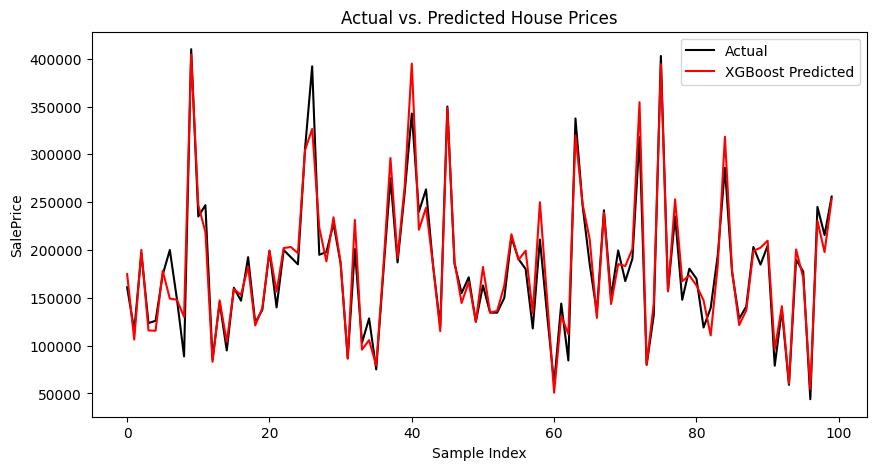

In [ ]:
# 📊 Visual Comparison
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='black')
plt.plot(y_pred_xgb[:100], label='XGBoost Predicted', color='red')
plt.legend()
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.show()

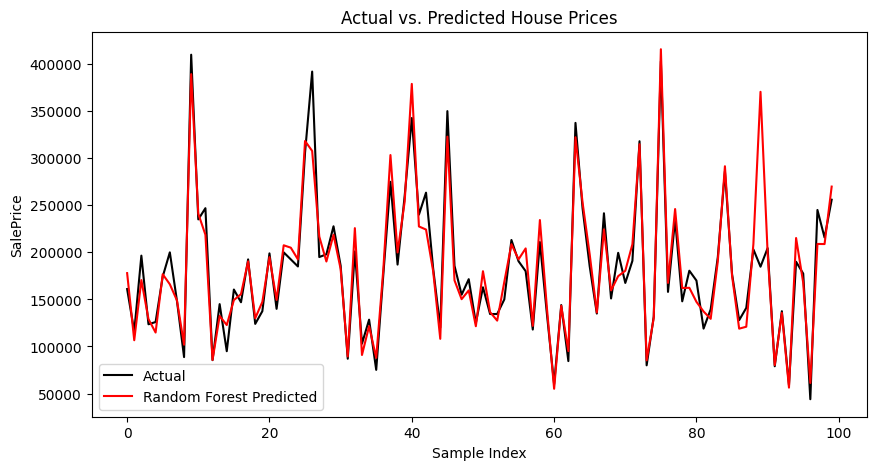

In [ ]:
# 📊 Visual Comparison
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='black')
plt.plot(y_pred_rf[:100], label='Random Forest Predicted', color='red')
plt.legend()
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.show()

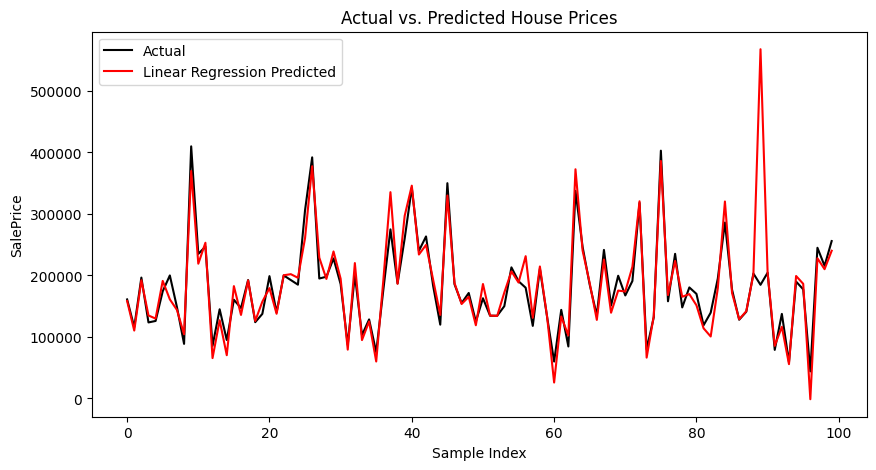

In [ ]:
#  Visual Comparison
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='black')
plt.plot(y_pred_lr[:100], label='Linear Regression Predicted', color='red')
plt.legend()
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.show()

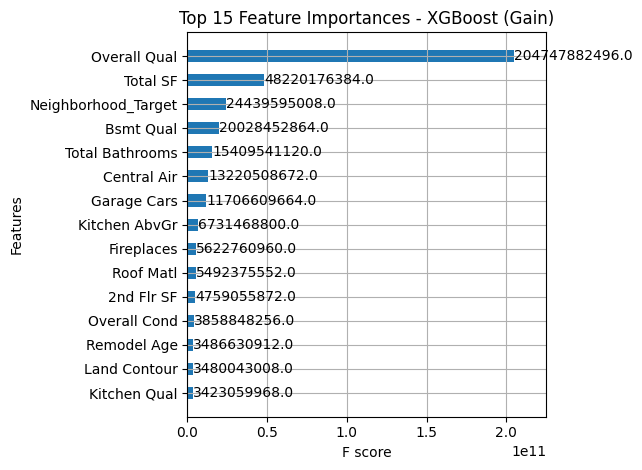

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb_module  # to avoid confusion with your model variable

# Plotting feature importance from your trained model
xgb_module.plot_importance(
    xgb,  # your trained model
    importance_type='gain',  # other options: 'weight', 'cover', 'total_gain', 'total_cover'
    max_num_features=15,     # top 15 features
    height=0.5
)

plt.title('Top 15 Feature Importances - XGBoost (Gain)')
plt.tight_layout()
plt.show()


### 🎯 Objective
The primary goal of this research was to build a robust regression model to accurately predict house sale prices using various property features. The outcome aims to support real estate investors, developers, and analysts in price estimation and informed decision-making.

### 📊 Data Overview

Dataset Size: 2,930 observations with 85 features (after preprocessing).

Target Variable: SalePrice

Key Feature Types:

Numerical: Gr Liv Area, Total Bsmt SF, Garage Area

Categorical: Neighborhood, Overall Qual, Roof Matl (encoded)

### 📈 Exploratory Data Analysis (EDA)

✅ Key Insights:


Strong Positive Correlation: Gr Liv Area, Total Bsmt SF, Garage Area show clear upward trends with SalePrice.

Pairplot & Regression Plot show linear tendencies, especially with living area size.

Visual patterns suggest that bigger and better-quality homes command higher prices.

 ###  Model Evaluation

| Model             | RMSE          | MAE           | R² Score |
| ----------------- | ------------- | ------------- | -------- |
| Linear Regression | 28,991.25     | 16,232.52     | 0.90     |
| Random Forest     | 24,364.85     | 15,047.34     | 0.93     |
| **XGBoost**       | **22,068.35** | **14,226.46** | **0.94** |


### Feature Importance Analysis (XGBoost)

📌 Feature Importance Analysis (XGBoost)
🔍 Top 5 Predictive Features:
Overall Qual: Quality rating of the house — most impactful predictor.

Total SF: Combined square footage — reflects house size.

Neighborhood (Target Encoded): Location plays a crucial role.

Basement Quality: Structural quality of below-ground rooms.

Total Bathrooms: Indicates livability and size.

These features highlight that home quality, location, and size are key drivers of price.